Intersecciones encontradas: [1.37333 4.08863]


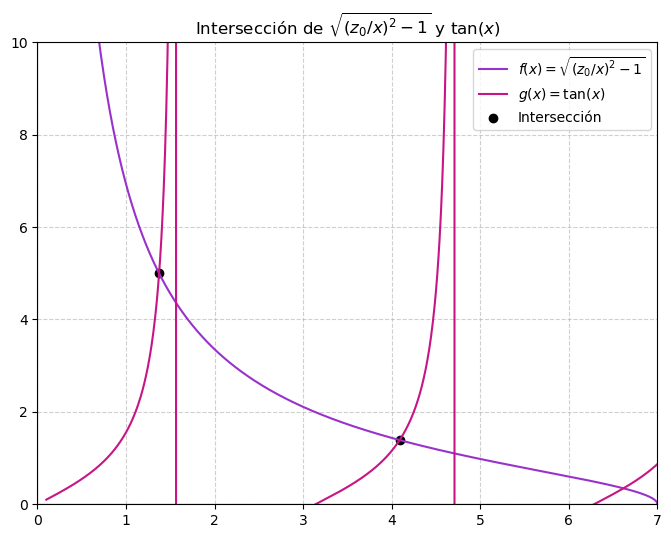

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las funciones
def f(x, z0):
    #Function f(x) = sqrt((z0/x)^2 - 1).
    #Just for x where (z0/x)^2 - 1 >= 0 (i.e., x <= z0). If que tried to calculate a negative root, numpy'd raise an error
    return np.sqrt((z0/x)**2 - 1)

def g(x):
    #Function g(x) = tan(x). Note: the tangent functions isnt't continous in pi/2, 3PI/2
    return np.tan(x)

def equation(x, z0):
    #Ecuation f(x) - tan(x) = 0 whose sqrt are the intersection points
    return f(x, z0) - g(x)

def newton_method(x0, z0, eps, max_iter=100, step=0.005):
    #Method Newton-Raphson to find the sqrt of the equation(x, z0).
    xold = x0 #initial aproximation of x0
    for _ in range(max_iter):
        func = equation(xold, z0)
        # Aproximation of the derivative
        dfunc = (equation(xold + step, z0) - equation(xold - step, z0)) / (2 * step)
        if dfunc == 0:
            return None  #Avoids dividing by 0
        xnew = xold - func / dfunc #Use of the function newton-raphson
        if abs(xnew - xold) < eps: #With this, if the difference between xold and xnew is smaller than eps, it considers to have found a srqt
            return xnew
        xold = xnew 
    return None #However if the derivative is 0, it returns none

def find_roots(z0, eps):
   #This divides the intervals (0, Z0] in smaller intervals of aproximately PI/2
    intersections = [] #Searches itersections inside every interval
    #Since f(x) is defined for x <= Z0, we restrict the domain
    interval_size = np.pi / 2
    num_intervals = int(np.floor(z0 / interval_size))
    
    for i in range(num_intervals):
        # Definir extremos del intervalo evitando los puntos problemáticos (como las asíntotas)
        a = i * interval_size + 0.1
        b = (i + 1) * interval_size - 0.1
        x0 = (a + b) / 2  # Valor inicial para Newton
        root = newton_method(x0, z0, eps)
        # Se acepta la raíz solo si se encuentra dentro del intervalo y es numérica
        if root is not None and a < root < b:
            intersections.append(root)
    
    # Eliminate dupes rounding up or dow the values
    intersections = np.unique(np.round(intersections, 5))
    return intersections

# Parameters. This will be changed to the correct values once the code works properly
z0 = 7
eps = 1e-5

# We call the function find_roots as to find the numeric intersections
intersections = find_roots(z0, eps)
print("Intersecciones encontradas:", intersections)

# Defines the x range on the graph from .1 to z0
x = np.linspace(0.1, z0, 1000)

# Create the graph
plt.figure(figsize=(8, 6))
plt.plot(x, f(x, z0), label=r'$f(x) = \sqrt{(z_0/x)^2 - 1}$', color='darkorchid')
plt.plot(x, g(x), label=r'$g(x) = \tan(x)$', color='mediumvioletred')

# Define the intersections
for idx, xi in enumerate(intersections):
    plt.scatter(xi, f(xi, z0), color='black', 
                label="Intersección" if idx == 0 else "")

plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.xlim(0, z0)
plt.ylim(0, 10)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.title(r"Intersección de $\sqrt{(z_0/x)^2 - 1}$ y $\tan(x)$")
plt.show()

C:\Users\pauuu\AppData\Local\Temp\ipykernel_25564\2842547340.py:7: RuntimeWarning: invalid value encountered in sqrt
  return np.where(val >= 0, np.sqrt(val), np.nan)  # Avoids negative sqrt values


Intersecciones pares encontradas: [1.3733260190718755, 4.088630420780366, 6.615965197175079]
Intersecciones impares encontradas: [2.739488530900863, 5.401716646115131]


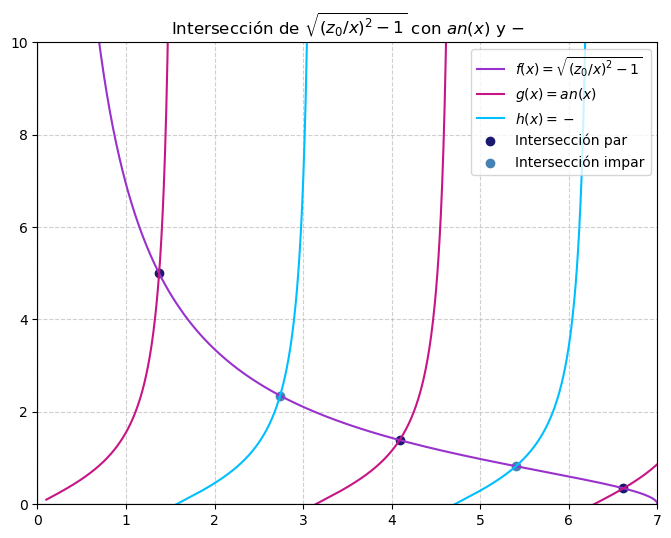

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = sqrt((z0/x)^2 - 1), ensuring the value inside sqrt is >= 0
def f(x, z0):
    val = (z0 / x) ** 2 - 1
    return np.where(val >= 0, np.sqrt(val), np.nan)  # Avoids negative sqrt values

# Define g(x) = tan(x)
def g(x):
    return np.tan(x)

# Define h(x) = -1/tan(x), avoiding division by zero
def h(x):
    tan_x = np.tan(x)
    return np.where(tan_x != 0, -1 / tan_x, np.nan)

# Difference functions for root finding
def diff(x, z0):
    return f(x, z0) - g(x)

def diff2(x, z0):
    return f(x, z0) - h(x)

# Define domain avoiding asymptotes (multiples of pi/2)
def safe_domain(z0, num_points=1000):
    x = np.linspace(0.1, z0, num_points)
    x = x[~np.isclose(np.mod(x, np.pi / 2), 0, atol=0.05)]  # Filter points near asymptotes
    return x

# Newton's method for intersection points
def newton_method(func, x0, z0, eps=1e-5, max_iter=100, step=0.005):
    xold = x0
    for _ in range(max_iter):
        f_val = func(xold, z0)
        df_val = (func(xold + step, z0) - func(xold - step, z0)) / (2 * step)
        if df_val == 0:
            return None  # Avoid division by zero
        xnew = xold - f_val / df_val
        if abs(xnew - xold) < eps:
            return xnew
        xold = xnew
    return None  # No convergence

# Function to find intersection points
def find_roots(z0, eps=1e-5):
    intersections_par = []
    intersections_impar = []
    interval_size = np.pi / 2
    max_intervals = int(np.floor(z0 / interval_size))

    for i in range(max_intervals):
        a, b = i * np.pi, (i + 0.5) * np.pi
        vals_inside_par = np.linspace(a + 0.01, b - 0.01, 50)
        for x0 in vals_inside_par:
            root = newton_method(diff, x0, z0, eps)
            if root and a < root < b and not any(np.isclose(root, r, atol=1e-3) for r in intersections_par):
                intersections_par.append(root)

        c, d = i * np.pi, (i + 1) * np.pi
        vals_inside_impar = np.linspace(c + 0.01, d - 0.01, 50)
        for x0 in vals_inside_impar:
            root = newton_method(diff2, x0, z0, eps)
            if root and c < root < d and not any(np.isclose(root, r, atol=1e-3) for r in intersections_impar):
                intersections_impar.append(root)

    return sorted(intersections_par), sorted(intersections_impar)

# Initial parameters
z0 = 7
x_val = safe_domain(z0)

# Evaluate functions safely
f_val = f(x_val, z0)
g_val = g(x_val)
h_val = h(x_val)

g_val[np.abs(g_val) > 100] = np.nan  # Limit extreme values
h_val[np.abs(h_val) > 100] = np.nan

# Find intersections
intersections_par, intersections_impar = find_roots(z0)
print("Intersecciones pares encontradas:", intersections_par)
print("Intersecciones impares encontradas:", intersections_impar)

# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(x_val, f_val, label=r'$f(x) = \sqrt{(z_0/x)^2 - 1}$', color='darkorchid')
plt.plot(x_val, g_val, label=r'$g(x) = 	an(x)$', color='mediumvioletred')
plt.plot(x_val, h_val, label=r'$h(x) = -rac{1}{	an(x)}$', color='deepskyblue')

# Plot intersection points
for xi in intersections_par:
    plt.scatter(xi, f(xi, z0), color='midnightblue', label='Intersección par' if xi == intersections_par[0] else '')
for xi in intersections_impar:
    plt.scatter(xi, f(xi, z0), color='steelblue', label='Intersección impar' if xi == intersections_impar[0] else '')

# Reference lines
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.xlim(0, z0)
plt.ylim(0, 10)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.title(r"Intersección de $\sqrt{(z_0/x)^2 - 1}$ con $	an(x)$ y $-rac{1}{	an(x)}$")
plt.show()
